# Modelo de Clasificación 
## POO y Regresión Logística

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,  LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import ClassifierMixin, RegressorMixin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error
import joblib

## Regresión Logística

In [49]:
class Procesamiento:
    def __init__(self, model_name: str):
        self.model_name = model_name
        self.data = pd.read_csv('data/wisconsinbreastcancerdata.csv')
        self.pre_process_data()

    def pre_process_data(self):
        self.processed_data = self.data.drop(['id', 'Unnamed: 32'], axis=1)
        self.processed_data['diagnosis'] = self.processed_data['diagnosis'].replace({'M': 1, 'B': 0})

    def split_data(self):
        X = self.processed_data.drop("diagnosis", axis=1)
        y = self.processed_data["diagnosis"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42)
        
        escalado = self.X_train.columns
        scaler = StandardScaler()
        self.X_train[escalado] = scaler.fit_transform(self.X_train[escalado])
        self.X_test[escalado] = scaler.transform(self.X_test[escalado])

class ProcesoDeAprendizaje(Procesamiento): 
    def train(self, model):
        print("1. Separando datos de train y test..")
        self.split_data()
        print(f"2. Entrenando modelo: {self.model_name}")
        self.fitted_model = model.fit(self.X_train, self.y_train)
        print("3. Entrenamiento finalizado")

        if isinstance(model, ClassifierMixin) and not isinstance(model, DummyClassifier):
            dummy = DummyClassifier(strategy="most_frequent")
            dummy.fit(self.X_train, self.y_train)
            dummy_preds = dummy.predict(self.X_test)
            print("\nComparación con DummyClassifier:")
            print(classification_report(self.y_test, dummy_preds))

class ClasificacionPrediccion:
    def __init__(self, fitted_model, X_test, y_test):
        self.fitted_model = fitted_model
        self.X_test = X_test
        self.y_test = y_test

    def predict(self):
        self.predictions = self.fitted_model.predict(self.X_test)
        print("Evaluación de Clasificación:")
        print(classification_report(self.y_test, self.predictions))

def hacer_prediccion(modelo, X_test, y_test):
    pred = ClasificacionPrediccion(modelo, X_test, y_test)
    pred.predict()
    return pred

In [50]:
processor = ProcesoDeAprendizaje(model_name="Regresion Logistica") 
processor.train(model=LogisticRegression())
prediccion = hacer_prediccion(processor.fitted_model, processor.X_test, processor.y_test)

acc = accuracy_score(processor.y_test, prediccion.predictions)
print(f"Accuracy: {acc:.4f}")

1. Separando datos de train y test..
2. Entrenando modelo: Regresion Logistica
3. Entrenamiento finalizado

Comparación con DummyClassifier:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        89
           1       0.00      0.00      0.00        54

    accuracy                           0.62       143
   macro avg       0.31      0.50      0.38       143
weighted avg       0.39      0.62      0.48       143

Evaluación de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy: 0.9790


/tmp/ipykernel_1315/1145923949.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.processed_data['diagnosis'] = self.processed_data['diagnosis'].replace({'M': 1, 'B': 0})
/home/azureuser/Marquinhos-MLDSRP1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/azureuser/Marquinhos-MLDSRP1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

### Guardado

In [51]:
def GuardadoyEmpaquetado(ml_object, name):
    joblib.dump(ml_object, f"models/{name}.joblib ")
    print("Modelo guardado exitosamente")

In [52]:
GuardadoyEmpaquetado(processor.fitted_model, "Regresión_Logistica_breastcancer")

Modelo guardado exitosamente


In [53]:
processor.fitted_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
joblib.load('models/Regresión_Logistica_breastcancer.joblib ')

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Regresión Lineal
### Aca estoy tomando el mismo codigo que armé en la primera parte de Logística y solo lo acomodo para poder aplicar regresión lineal.

In [60]:
class Procesamiento:
    def __init__(self, model_name: str):
        self.model_name = model_name
        self.data = pd.read_csv('data/wisconsinbreastcancerdata.csv')
        self.pre_process_data()

    def pre_process_data(self):
        self.processed_data = self.data.drop(['id', 'Unnamed: 32'], axis=1)
        self.processed_data['diagnosis'] = self.processed_data['diagnosis'].replace({'M': 1, 'B': 0})

    def split_data(self):
        X = self.processed_data.drop("radius_mean", axis=1)
        y = self.processed_data["radius_mean"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=100)

class ProcesoDeAprendizaje(Procesamiento): 
    def train(self, model):
        print("1. Separando datos de train y test..")
        self.split_data()
        print(f"2. Entrenando modelo: {self.model_name}")
        self.fitted_model = model.fit(self.X_train, self.y_train)
        print("3. Entrenamiento finalizado")

class RegresionPrediccion:
    def __init__(self, fitted_model, X_test, y_test):
        self.fitted_model = fitted_model
        self.X_test = X_test
        self.y_test = y_test

    def predict(self):
        self.predictions = self.fitted_model.predict(self.X_test)
        print("Evaluación de Regresión:")
        print(f"MSE: {mean_squared_error(self.y_test, self.predictions):.2f}")
        print(f"R²: {r2_score(self.y_test, self.predictions):.2f}")


def hacer_prediccion(modelo, X_test, y_test):
    if isinstance(modelo, ClassifierMixin):
        pred = ClasificacionPrediccion(modelo, X_test, y_test)
    elif isinstance(modelo, RegressorMixin):
        pred = RegresionPrediccion(modelo, X_test, y_test)
    else:
        raise ValueError("El modelo no es de clasificación ni de regresión.")
    pred.predict()
    return pred

def presentacionmodelo(y_real, y_pred):
    plt.figure(figsize=(8,5))
    sns.regplot(x=y_real, y=y_pred)
    plt.xlabel("Valor real de radius_mean")
    plt.ylabel("Valor predicho de radius_mean")
    plt.title("Regresión: Valor real vs Valor predicho (radius_mean)")
    plt.show()


/tmp/ipykernel_1315/2134894904.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.processed_data['diagnosis'] = self.processed_data['diagnosis'].replace({'M': 1, 'B': 0})


1. Separando datos de train y test..
2. Entrenando modelo: Regresión para radius_mean
3. Entrenamiento finalizado
Evaluación de Regresión:
MSE: 0.01
R²: 1.00


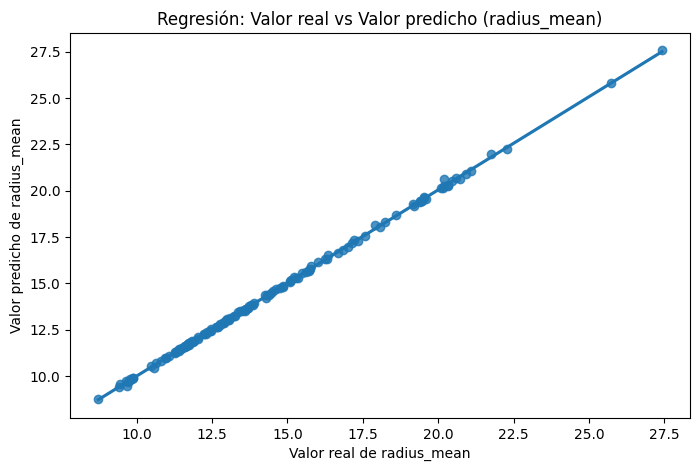

In [61]:
processor = ProcesoDeAprendizaje(model_name="Regresión para radius_mean") 
processor.train(model=LinearRegression())
prediccion = hacer_prediccion(processor.fitted_model, processor.X_test, processor.y_test)
presentacionmodelo(processor.y_test, processor.fitted_model.predict(processor.X_test))

In [62]:
GuardadoyEmpaquetado(processor.fitted_model, "Regresión_Lineal_breastcancer_radiusmean")

Modelo guardado exitosamente
